In [2]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
from selenium import webdriver

In [3]:
driver = webdriver.Chrome('../driver/chromedriver.exe')

In [4]:
driver.get("http://bc.kyobobook.co.kr/front/event/klover.ink")

In [5]:
html = driver.page_source
soup = BeautifulSoup(html,'lxml')

In [6]:
soup = soup.find('div', {'class':'review_list_wrap'})

In [62]:
print(soup.prettify())

<div class="review_list_wrap">
 <div class="sttl" id="reviewList_sttl">
  <span>
   나의 클로버 리뷰 (15587명)
  </span>
 </div>
 <ul id="reviewList">
  <li>
   <div class="title">
    <a href='javascript:showProdContents("KOR","9788967442262","ya4","");'>
     <strong>
      건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)
     </strong>
    </a>
   </div>
   <div class="cont">
    <a href='javascript:getKloverReviewUrl("4597156");'>
     <div class="simple_review_info">
      <div class="write_info">
       <span class="klover">
        <span class="klover_off" style="background:none;">
         <span class="klover_on" style="width:100%;background-position-y:1px;">
         </span>
        </span>
        <span class="klover_point">
         4/4점 만점
        </span>
       </span>
       <strong>
        al**g0428
       </strong>
       <span>
        2020.12.16
       </span>
       <span class="ico_bought">
        <img alt="유용해요" src="http://image.kyobobook.com/mimages/static2/images/common/icon/ico

In [63]:
bookname=soup.select('div.title')[-10].text
bookname = bookname.strip()
bookname

'건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)'

In [64]:
bookrate = soup.select('span.klover_point')[1].text
bookrate

'4/4점 만점'

In [65]:
soup.select('div.write_info > span')[4]

<span>2020.12.10</span>

In [66]:
ratedate=soup.select('div.write_info > span')[1].text
ratedate=ratedate.strip()
ratedate

'2020.12.16'

In [67]:
soup.select('span.ico_bought > img')[0]

<img alt="유용해요" src="http://image.kyobobook.com/mimages/static2/images/common/icon/ico_commt_05.png"/>

In [68]:
a=soup.select('span.ico_bought > img')[0]
a=str(a)
aa=a.index('"')+1
aaa=a.index('"', aa)
booktag = a[aa:aaa]
booktag

'유용해요'

In [69]:
bookreview = soup.select('div.review')[0].text
bookreview

'건강에 대한 대백과사전과같은책'

In [122]:
def findtag(a):
    a=str(a)
    aa=a.index('"')+1
    aaa=a.index('"', aa)
    booktag = a[aa:aaa]
    return booktag

In [123]:
bookname = []
bookrate = []
ratedate = []
booktag = []
bookreview = []
reviewlike=[]
for j in range(100):
    html = driver.page_source
    soup = BeautifulSoup(html,'lxml')
    soup = soup.find('div', {'class':'review_list_wrap'})
    for i in range(-10, 0, 1):
        #책 제목
        a = soup.select('div.title')[i].text
        a = a.strip()
        bookname.append(a)
        #책 평점
        b=soup.select('span.klover_point')[i].text
        bookrate.append(b)
        #책 리뷰 남긴 날짜
        c=soup.select('div.write_info > span')[(i*3)+1].text
        ratedate.append(c)
        #책 태그(좋아요, 유용해요 등)
        d=soup.select('span.ico_bought > img')[i]
        d=findtag(d)
        booktag.append(d)
        #책 리뷰
        e=soup.select('div.review')[i].text
        bookreview.append(e)
        #책 리뷰에 달린 좋아요 수
        f = soup.select('span.like')[i].text
        reviewlike.append(f)
        
    driver.find_element_by_xpath('''//*[@id="btn_more"]/button''').click()

In [72]:
bookname.head()

['건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)',
 '부의 인문학',
 '존리의 부자되기 습관(교보 단독 리커버)',
 '방구석 미술관. 2: 한국',
 '울지 않는 늑대',
 '나를 잃어가면서 지켜야 할 관계는 없다',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '실패하지 않는 웹소설 연재의 기술',
 '달러구트 꿈 백화점',
 '흔한남매. 2',
 '내 삶을 바꾸는 치유 명상 수업',
 '전투수학(2020)(유튜버 연고맨의)',
 '인간실격(새움 세계문학)',
 '진이, 지니',
 '가장 빛나는 순간은 아직 오지 않았다',
 '1cm 다이빙',
 '사는 이유가 그대라서',
 '너무 한낮의 연애',
 '굿 라이프(양장본 HardCover)',
 '루팡의 딸',
 '한국사능력검정시험 기본서: 심화 1, 2, 3급(2020)(에듀윌)',
 '애쓰지 않고 편안하게(스노우볼 에디션)',
 '내가 원하는 삶을 살았더라면',
 '지적 대화를 위한 넓고 얕은 지식: 제로 편',
 '두 마리 토끼가 넘나들다',
 '가장 빛나는 순간은 아직 오지 않았다',
 '돈을 부르는 작은 습관',
 '룬의 아이들 데모닉 세트(양장본 HardCover)(전9권)',
 '30개 도시로 읽는 세계사',
 '공기업 NCS 통합 봉투모의고사 5회(2020 하반기)(에듀윌)',
 '공리주의(현대지성 클래식 31)',
 '경제기사 궁금증 300문 300답(2020)',
 '나는 더 이상 침묵하지 않기로 했다',
 '세법강의 Summary. 1: 부가가치세, 소득세(2020)(개정판)',
 '까면서 보는 해부학 만화(한빛비즈 교양툰 8)',
 '설민석의 조선왕조실록',
 '호킹',
 '자본과 이데올로기(양장본 HardCover)',
 '서양화 자신있게 보기 1',
 '열한 계단',
 '꿈꾸는 레모네이드 클럽',
 '조용한 아내',
 '모두의 몫을 모두에게',
 '나쁜 페미니스트',
 '한낮의 우울',
 '

In [73]:
bookrate.head()

['4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '2/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '2/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '2/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '4/4점 만점',
 '3/4점 만점',
 '4/

In [74]:
ratedate.head()

['2020.12.16',
 '2020.12.10',
 '2020.11.29',
 '2020.11.27',
 '2020.11.27',
 '2020.11.16',
 '2020.11.15',
 '2020.11.15',
 '2020.10.31',
 '2020.10.27',
 '2020.10.21',
 '2020.10.20',
 '2020.10.17',
 '2020.10.17',
 '2020.10.14',
 '2020.10.07',
 '2020.09.26',
 '2020.09.13',
 '2020.09.06',
 '2020.09.04',
 '2020.08.15',
 '2020.08.14',
 '2020.08.11',
 '2020.08.11',
 '2020.08.08',
 '2020.08.04',
 '2020.07.31',
 '2020.07.31',
 '2020.07.27',
 '2020.07.26',
 '2020.07.19',
 '2020.07.12',
 '2020.07.08',
 '2020.07.03',
 '2020.06.30',
 '2020.06.19',
 '2020.06.12',
 '2020.06.12',
 '2020.06.06',
 '2020.06.06',
 '2020.05.31',
 '2020.05.31',
 '2020.05.29',
 '2020.05.28',
 '2020.05.18',
 '2020.05.17',
 '2020.05.16',
 '2020.05.11',
 '2020.05.08',
 '2020.05.08',
 '2020.05.06',
 '2020.05.05',
 '2020.05.01',
 '2020.04.28',
 '2020.04.28',
 '2020.04.28',
 '2020.04.26',
 '2020.04.26',
 '2020.04.25',
 '2020.04.24',
 '2020.04.23',
 '2020.04.22',
 '2020.04.17',
 '2020.04.15',
 '2020.04.15',
 '2020.04.15',
 '2020.04.

In [75]:
booktag.head()

['유용해요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '유용해요',
 '잘읽혀요',
 '좋아요',
 '잘읽혀요',
 '기발해요',
 '좋아요',
 '좋아요',
 '유용해요',
 '좋아요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '좋아요',
 '정독해요',
 '좋아요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '유용해요',
 '정독해요',
 '정독해요',
 '정독해요',
 '좋아요',
 '좋아요',
 '유용해요',
 '정독해요',
 '잘읽혀요',
 '기타',
 '좋아요',
 '기발해요',
 '잘읽혀요',
 '잘읽혀요',
 '정독해요',
 '좋아요',
 '잘읽혀요',
 '좋아요',
 '잘읽혀요',
 '정독해요',
 '기타',
 '정독해요',
 '정독해요',
 '기타',
 '잘읽혀요',
 '좋아요',
 '좋아요',
 '좋아요',
 '잘읽혀요',
 '유용해요',
 '좋아요',
 '정독해요',
 '정독해요',
 '좋아요',
 '잘읽혀요',
 '정독해요',
 '잘읽혀요',
 '좋아요',
 '유용해요',
 '정독해요',
 '좋아요',
 '잘읽혀요',
 '유용해요',
 '좋아요',
 '좋아요',
 '좋아요',
 '좋아요',
 '유용해요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '정독해요',
 '좋아요',
 '잘읽혀요',
 '유용해요',
 '좋아요',
 '잘읽혀요',
 '좋아요',
 '잘읽혀요',
 '좋아요',
 '좋아요',
 '좋아요',
 '좋아요',
 '좋아요',
 '잘읽혀요',
 '유용해요',
 '잘읽혀요',
 '잘읽혀요',
 '잘읽혀요',
 '좋아요',
 '기발해요',
 '잘읽혀요',
 '잘읽혀요',
 '좋아요',
 '잘읽혀요',
 '기타']

In [76]:
bookreview.head()

['건강에 대한 대백과사전과같은책',
 '부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움',
 '전달하는 내용이 명확하고 꼭 필요한 내용들',
 '어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제부터라도 가까워졌으니 만족~!!',
 '도서관에서 빌려 읽었다가 하루만에 다 읽은 책.\n특히 새벽에 잘 읽혔는데 정말 재밌게 봐서 이번엔 빌리지않고 사서 읽고있습니다. 우리가 잘 몰랐던 동물들만의 세계와 그들의 시선으로 본 인간들의 세계를 이해할 수 있었습니다. 그리고 약간의 개그까지. 새벽에 보다가 빵 터져서 엄마가 놀라 제 방에 왔던 기억이 나네요. 꼭 읽어보시길.',
 '나 자신을 중요시 해야 \n다른 사람도 있습니다。',
 '우아네기! 우리아이를 영어잘하게 만들고 싶다면!\n한국에서 우리아이를 네이티브로 키울수 있는 방법!!!!\n3세부터는 무조건 영어노출을 시작해야 합니다!!!!',
 '우아네기 2판 ♡ 엄마아빠라면 반드시 읽어야 하는책!!!!!\n특히 아이가 3세 이하라면 무조건 읽고 따라해보세요\n우리아이가 정말 네이티브처럼 영어로 말을 합니다!!!!\n영어학원을 보내기 전에 반드시 꼭 읽어봐야하는책 !!!',
 '가볍게 읽을만합니다.',
 '�� 꿈은... 숨 가쁘게 이어지는 직선 같은 삶에,\n신께서 공들여 그려 넣은 쉼표인 것 같아요!\n��왜, 푹 자는 것만으로도 어제의 근심이 눈 녹듯 사라지고, 오늘을 살아갈 힘이 생길 때가 있잖아요? 바로 그거예요. 꿈을 꾸지 않고 푹 자든, 여기 이 백화점에서 파는 좋은 꿈을 꾸든, 저마다 잠든 시간을 이용해서 어제를 정리하고 내일을 준비할 수 있게 만들어지는 거예요.\n그렇게 생각하면 잠든 시간도 더는 쓸모없는 시간이 아니게 되죠.\n\n연약한 이들의 마음을 단단하게 만들어주며, 경솔한 이들이 잊지 말았어야 할 것들을 다시 떠올릴 수 있게 도와주는 그것을 시간의 신은 \'꿈\'이라고 이름붙였고, 오늘과 내일을 이어주는 구름다리가 되었다

In [77]:
reviewlike.head()

['0',
 '0',
 '0',
 '0',
 '0',
 '2',
 '9',
 '8',
 '2',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '4',
 '1',
 '2',
 '0',
 '1',
 '14',
 '5',
 '1',
 '0',
 '1',
 '1',
 '7',
 '3',
 '0',
 '1',
 '1',
 '2',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '2',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '0',
 '3',
 '0',
 '2',
 '3',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '2',
 '0',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '2',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '2',
 '0',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2']

In [125]:
len(bookrate), len(ratedate), len(booktag), len(bookreview), len(reviewlike)

(1000, 1000, 1000, 1000, 1000)

In [132]:
review_df = pd.DataFrame({'bookname' : bookname, 
                          'bookrate' : bookrate, 
                          'ratedate' : ratedate, 
                          'booktag' : booktag, 
                          'bookreview' : bookreview, 
                          'reviewlike' : reviewlike})

In [133]:
review_df

,bookname,bookrate,ratedate,booktag,bookreview,reviewlike
0,건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover),4/4점 만점,2020.12.16,유용해요,건강에 대한 대백과사전과같은책,0
1,부의 인문학,4/4점 만점,2020.12.10,잘읽혀요,부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움,0
2,존리의 부자되기 습관(교보 단독 리커버),3/4점 만점,2020.11.29,잘읽혀요,전달하는 내용이 명확하고 꼭 필요한 내용들,0
3,방구석 미술관. 2: 한국,4/4점 만점,2020.11.27,잘읽혀요,어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제...,0
4,울지 않는 늑대,4/4점 만점,2020.11.27,잘읽혀요,도서관에서 빌려 읽었다가 하루만에 다 읽은 책.\n특히 새벽에 잘 읽혔는데 정말 재...,0
...,...,...,...,...,...,...
995,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,힐링 도서,0
996,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,감동적이예요,0
997,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,보는것만으로도 만족,0
998,넬리 블라이의 세상을 바꾼 10일,4/4점 만점,2018.10.29,잘읽혀요,여성을 억압하고 학대하는 현장을 고발하는 여성 기자의 잠입 취재기,0


In [134]:
review_df['bookrate'].unique()

array(['4/4점 만점', '3/4점 만점', '2/4점 만점', '1/4점 만점'], dtype=object)

In [145]:
one_point=review_df['bookrate'] == '1/4점 만점'
one = review_df[one_point]
one['bookreview']

138                  자신의 내면을 생각하게합니다.
229                           .......
540                            Nah...
670                            유용해보여요
680                            잘모르겠어요
942    의료진과 사전 합의가 아니라 사후 합의 출판이라...?
949                 이도저도아닌 여러모로 별로...
Name: bookreview, dtype: object

In [144]:
two_point=review_df['bookrate'] == '2/4점 만점'
two = review_df[two_point]
two['bookreview']

14                           결말까지 술술 빠르게 읽혀서 하루만에 다 읽었어요
44     미국 책, 드라마, 영화에 대한 평이 주로 나와서 잘 안 읽혔다. 페미니즘만 다루는...
47     용두사미...1귄 까지는 잘 봤지만 2권 후반후로 접어들수록 김빠진다.\n하지만 생...
164    컴퓨터 과학에 페미니즘을 묻히길래 얼마나 신박한 소리를 하려고 하나하고 사봤다. 페...
234                         영화를보는것같은사실적인묘사와빠른전개.저는좋았습니다.
251    매 페이지가 귀여운 그림과 짧은 글로 이루어져 있어요. 핀란드인에 국한되지 않고, ...
255                                      좋을 것 같아요 좋다고 하니
285    기대감이 컸는지 조금 실망했어요.. 잘읽히기는 하는데 결말이 너무 허무하게... 마...
443              번역을 이상하게 한 건지 책이 더럽게 재미없고 안읽히네요 내용은 좋아요
534                                               슬란자 바!
575                                                정말좋아요
602    215. 그녀는 혜인의 마음속에서 완전히 죽어버렸다가도 어느 순간이면 다시 살아나는...
682                        한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음
700                                            와닿는 글이 많다
935                                   어떤 글은 섬세하고 공감이 가요.
978                                                괜찮아요.
984                                            애매한 재미네요.
Name: bookreview, dtype: object

In [147]:
three_point=review_df['bookrate'] == '3/4점 만점'
three = review_df[three_point]
three['bookreview']

2                                전달하는 내용이 명확하고 꼭 필요한 내용들
5                            나 자신을 중요시 해야 \n다른 사람도 있습니다。
18                       다음에 다시 읽을 때는 어떻게 다가올지 기대되는 이야기들
20             신박한듯 아닌듯 가볍고 유쾌하고 무겁지 않게 읽을 수 있는 재밌는 추리소설
65     책을 부담없이 읽어도 된다는 것을 알게된거 같다\n책을 끝까지 읽어야 한다는 의무감...
                             ...                        
956         제목을 보니 끌려서 읽어보니 정말 공감부분 많아서 도움 되었고 위안 되었습니다.
969                                          어린시절로 돌아간느낌
980                                    기대만큼 대단친 않았지만 그래도
985                                            잘 읽혀서 좋아요
993                       실제 상황과 소설의 상황이 교차로 진행되어 신선하네요.
Name: bookreview, Length: 141, dtype: object

In [151]:
train = [('추억의 결정체', 'pos'),
        ('유용합니다','pos'),
        ('최고의 작품입니다', 'pos'),
         ('고전입니다','pos'),
         ('현명하고 지혜가 가득한 아이 양육방법에 도움이 많이 됩니다!','pos'),
         ('잘모르겠어요', 'neg'),
         ('이도저도아닌 여러모로 별로...', 'neg'),
         ('애매한 재미네요.', 'neg'),
         ('미국 책, 드라마, 영화에 대한 평이 주로 나와서 잘 안 읽혔다.','neg'),
         ('페미니즘만 다루는 건 아니고 인종차별에 대한 내용도 아주 많이 다룬다.', 'neg'),
         ('기대감이 컸는지 조금 실망했어요..', 'neg'),
         ('잘읽히기는 하는데 결말이 너무 허무하게...', 'neg'),
         ('마지막 한패이지 읽기 위해서 완결한 책. ㅠㅠ','neg'),
         ('용두사미...1귄 까지는 잘 봤지만 2권 후반후로 접어들수록 김빠진다.','neg'),
         ('하지만 생각할 거리는 많았음!','pos'),
         ('베르나르의 소설만의 특징이 잘 드러났다.','pos'),
         ('번역을 이상하게 한 건지 책이 더럽게 재미없고 안읽히네요 내용은 좋아요','neg'),
         ('한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음', 'neg'),
         ('기대만큼 대단친 않았지만 그래도', 'neg'),
         ('넘 재밌고 신선해요','pos'),
         ('마음이 따뜻해지는 책이었습니다','pos'),
         ('아주좋아요','pos'),
         ('가을에 읽기 좋아요','pos'),
         ('나 자신을 한 번 더 생각하고, 더 사랑하고 싶게 만드는 책이다.','pos'),
         ('처음 책을 읽으시는분에게 추천드립니다','pos'),
         ('정말 좋았어요 너무 추천!','pos'),
         ('항상 곁에 두고 삶의 등불로 삼을 수 있는 좋은 핵입니다.','pos'),
         ('읽기만해도 행복해지는 책~~','pos'),
         ('있을때잘하자!라는 말밖에...','neg'),
         ('유럽여행 중 들고다니면서 큰 도움 되었습니다','pos'),
         ('콘텐츠의 함정이 원제입니다.','neg'),
         ('콘텐츠 자체보다는','neg'),
         ('두께의 압박은 있지만','neg'),
         ('정말 재밌어요!','pos'),
         ('반전이 주는 교훈이 대단해요','pos'),
         ('정말 좋아요 최고에요','pos'),
         ('감동 교훈 꽉 찼어요','pos'),
         ('최곱니다 소장각','pos'),
         ('꿈같은  책','pos'),
         ('좋아요','pos'),
         ('위로가되네요','pos'),
         ('따뜻해졌어요','pos'),
         ('썼는데 다시 쓰네요.','pos'),
         ('쏘쏘해요','neg'),
         ('정말 명작입니다.','pos'),
         ('유용해보여요','pos'),
         ('잘모르겠어요','neg'),
         ('한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음','neg'),
         ('제목만 들었을때는 딱딱한 느낌이었는데','neg'),
         ('아이가 너무 좋아해요','pos')]

In [152]:
len(train)

50

In [153]:
train = [('인문학접근에 좋은 책이예요', 'pos'),
                  ('직관적이고 직설적이어서 쉽게 읽을 수 있고 쉬워요', 'pos'),
                  ('재미있게 읽었어요', 'pos'),
                  ('읽기에 좋은 책입니다', 'pos'),
                  ('생생함과 따뜻함을 건네 주었다', 'pos'),
                  ('두고두고 읽고 싶은 따뜻한 이야기', 'pos'),
                  ('인생에 도움이 되는 책이다', 'pos'),
                  ('어렵게만 생각했던 것을 조금이라도 가깝고 쉽게 생각할 수 있는 계기가 되었다', 'pos'),
                  ('크게 도움이 될 것 같다', 'pos'),
                  ('알기 쉽게 설명해줘서 아주 잘 읽혀요', 'pos'),
                  ('두꺼워서 그렇지 꼭 읽어야 할 책이예요', 'pos'),
                  ('마음의 위로가 되는 책', 'pos'),
                  ('지문이 너무 길고 낱말이 어려워 지루해요', 'neg'),
                  ('책의 무게에 비해서 표지가 너무 가볍다', 'neg'),
    ('생각보다 딱딱하고 재미가 없어요', 'neg'),
    ('읽는데 우울하고 고통스럽고 그래요', 'neg'),
    ('1권 까지는 잘 봤지만 2권 후반후로 접어들수록 김빠진다', 'neg'),
    ('생각보다 딱딱하고 재미가 없어요', 'neg'),
    ('내용에 공감할 수가 없어요', 'neg'),
    ('인생에 도움이 되지 않는 것 같습니다', 'neg'),
    ('내용에 공감할 수가 없어요', 'neg'),
    ('무겁게 느껴지고 문장의 표현이 셈세하지 않습니다', 'neg'),
    ('내용에 공감할 수가 없어요', 'neg'),
         ('추억의 결정체', 'pos'),
        ('유용합니다','pos'),
        ('최고의 작품입니다', 'pos'),
         ('고전입니다','pos'),
         ('현명하고 지혜가 가득한 아이 양육방법에 도움이 많이 됩니다!','pos'),
         ('잘모르겠어요', 'neg'),
         ('미국 책, 드라마, 영화에 대한 평이 주로 나와서 잘 안 읽혔다.','neg'),
         ('페미니즘만 다루는 건 아니고 인종차별에 대한 내용도 아주 많이 다룬다.', 'neg'),
         ('기대감이 컸는지 조금 실망했어요..', 'neg'),
         ('잘읽히기는 하는데 결말이 너무 허무하게...', 'neg'),
         ('마지막 한패이지 읽기 위해서 완결한 책. ㅠㅠ','neg'),
         ('용두사미...1귄 까지는 잘 봤지만 2권 후반후로 접어들수록 김빠진다.','neg'),
         ('하지만 생각할 거리는 많았음!','pos'),
         ('베르나르의 소설만의 특징이 잘 드러났다.','pos'),
         ('번역을 이상하게 한 건지 책이 더럽게 재미없고 안읽히네요 내용은 좋아요','neg'),
         ('한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음', 'neg'),
         ('기대만큼 대단친 않았지만 그래도', 'neg'),
         ('넘 재밌고 신선해요','pos'),
         ('마음이 따뜻해지는 책이었습니다','pos'),
         ('아주좋아요','pos'),
         ('가을에 읽기 좋아요','pos'),
         ('나 자신을 한 번 더 생각하고, 더 사랑하고 싶게 만드는 책이다.','pos'),
         ('처음 책을 읽으시는분에게 추천드립니다','pos'),
         ('정말 좋았어요 너무 추천!','pos'),
         ('항상 곁에 두고 삶의 등불로 삼을 수 있는 좋은 핵입니다.','pos'),
         ('읽기만해도 행복해지는 책~~','pos'),
         ('있을때잘하자!라는 말밖에...','neg'),
         ('유럽여행 중 들고다니면서 큰 도움 되었습니다','pos'),
         ('콘텐츠의 함정이 원제입니다.','neg'),
         ('콘텐츠 자체보다는','neg'),
         ('두께의 압박은 있지만','neg'),
         ('정말 재밌어요!','pos'),
         ('반전이 주는 교훈이 대단해요','pos'),
         ('정말 좋아요 최고에요','pos'),
         ('감동 교훈 꽉 찼어요','pos'),
         ('최곱니다 소장각','pos'),
         ('꿈같은  책','pos'),
         ('좋아요','pos'),
         ('위로가되네요','pos'),
         ('따뜻해졌어요','pos'),
         ('썼는데 다시 쓰네요.','pos'),
         ('쏘쏘해요','neg'),
         ('정말 명작입니다.','pos'),
         ('유용해보여요','pos'),
         ('잘모르겠어요','neg'),
         ('한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음','neg'),
         ('제목만 들었을때는 딱딱한 느낌이었는데','neg'),
         ('아이가 너무 좋아해요','pos'),
        ('미국 책, 드라마, 영화에 대한 평이 주로 나와서 잘 안 읽혔다.','neg'), 
                  ('용두사미...1권 까지는 잘 봤지만 2권 후반후로 접어들수록 김빠진다.' , 'neg'), 
                  ('컴퓨터 과학에 페미니즘을 묻히길래 얼마나 신박한 소리를 하려고 하나하고 사봤다. 페미니즘적인 얘기만 거르면(얼마 있지도 않고) 인공지능을 사용하는 인간들의 격차가 심각하게 벌어지고 ... 이런 경고를 하는 책이다. 대량살상수학무기 같은 책' , 'neg'), 
                  ('기대감이 컸는지 조금 실망했어요.. 잘읽히기는 하는데 결말이 너무 허무하게... 마지막 한패이지 읽기 위해서 완결한 책. ㅠㅠ' , 'neg'), 
                  ('번역을 이상하게 한 건지 책이 더럽게 재미없고 안읽히네요' ,'neg'), 
                  ('잘모르겠어요' ,'neg'), 
                  ('한번 읽기에는 괜찮은책이지만 기억에 딱히 남지는 않음', 'neg'), 
                  ('이도저도아닌 여러모로 별로...' ,'neg'), 
                  ('애매한 재미네요.', 'neg'),
                  ('지루해요' , 'neg'), 
                  ('별로네요', 'neg'), 
                  ('재미없어요' ,'neg'), 
                  ('기대만큼 못하네요', 'neg'), 
                  ('허무해요' ,'neg'), 
                  ('돈이 아깝네요' ,'neg'), 
                  ('실망이네요' , 'neg'), 
                  ('아쉬워요' , 'neg'),
                  ('쉽게 읽히고 이해하기 쉬움' , 'pos'), 
                  ('전달하는 내용이 명확하고 꼭 필요한 내용들' , 'pos'), 
                  ('가볍게 읽을만합니다.' , 'pos'), 
                  ('재미있는지 6살 울아들이 엄청 좋아해요' , 'pos'), 
                  ('10월의 멋진 가을에 딱~ 읽기 좋은 책이네요~ 저자 채환님 감사합니다. 그리고 첫 책 출간 축하드립니다~^^', 'pos'), 
                  ('결말까지 술술 빠르게 읽혀서 하루만에 다 읽었어요' , 'pos'), 
                  ('글이 편안하게 잘 읽혀서 좋았어요.' , 'pos'), 
                  ('돈에 관심은 많지만 돈과 친하지 않은 사람들이 꼭 읽어야 할 책!' , 'pos'), 
                  ('좋았습니다 책표지 예뻐요' , 'pos'), 
                  ('가족이 함께 읽고 웃고 우는 책. 이 책은 우리 가족에게 감동과 깊은 여운을 주었어요. 강추합니다.', 'pos'), 
                  ('마음의 위로가 되는 처방전' ,'pos'), 
                  ('올해 최고의 소설', 'pos'), 
                  ('정말 명작답게 생각해 볼 거리도 많고 잘 읽히네요','pos'), 
                  ('공감되고 좋아요!','pos'), 
                  ('다시읽고또읽어도 여운이 남는책!', 'pos'),
         
                  ('제목부터 마음에 인상을 남기네요~  훌훌 잘 읽혀요', 'pos'), 
                  ('마음이 따뜻해지는 책이예요', 'pos'),
                  ('따뜻해요...', 'pos'),
                  ('너무 마음이 따뜻해지는 책이에요~', 'pos'),
                  ('필독서입니다', 'pos'),
                  ('좋습니다ㅜㅠ', 'pos'),
                  ('읽어보아야 나를 뒤돌아볼 수 있는 기회가 오더라', 'pos'),
                  ('우연찮은 기회에 펭귄과 살게 되는 실화바탕 이야기입니다. 잘 읽히고, 재밌어요.', 'pos'),
                  ('바라보는 입장에 따라 달리 생각하면서 나와 주변인들의 관계에서도 시선을 달리 보면서 개선 될수있는 책인것 같네요', 'pos'),
                  ('아주좋아요', 'pos'),
                  ('마음이 따뜻해지는 책이었습니다', 'pos'),
                  ('가을에 읽기 좋아요', 'pos'),
                  ('나 자신을 한 번 더 생각하고, 더 사랑하고 싶게 만드는 책이다.', 'pos'),
                  ('처음 책을 읽으시는분에게 추천드립니다', 'pos'),
                  ('좋고 잘읽히고 기발하고 유용한데 한가지밖에 고를수 없네요! 마케팅 전문가가 쓴 책이지만 누가 읽어도 재밌게 읽히고 생각하게 되는 좋은 책입니다! 정말 좋았어요 너무 추천!', 'pos'),
                  ('항상 곁에 두고 삶의 등불로 삼을 수 있는 좋은 핵입니다.', 'pos'),
                  ('넘 재밌고 신선해요', 'pos'),
                  ('읽기만해도 행복해지는 책~~', 'pos'),
                  ('역사에 대한 유시민선생님의 시각을 볼 수 있어서 좋았습니다', 'pos'),
                  ('있을때잘하자!라는 말밖에...', 'pos'),
                  ('마음편하게 가볍게 볼수있다\n힐링이되는책', 'pos'),
                  ('유럽여행 중 들고다니면서 큰 도움 되었습니다', 'pos'),
                  ('두께의 압박은 있지만, 정말 재밌어요!', 'pos'),
                  ('반전이 주는 교훈이 대단해요', 'pos'),
                  ('정말 좋아요 최고에요', 'pos'),
                  ('감동 교훈 꽉 찼어요', 'pos'),
                  ('최곱니다 소장각', 'pos'),
                  ('일단 푸가 귀여워요', 'pos'),
                  ('꿈같은  책', 'pos'),
                  ('좋아요 좋아요', 'pos'),
                  ('소장하여 읽고 싶어요. ','pos'),
                  ('서양인의 눈으로 본 동양을 알 수 있습니다', 'pos'),
                  ('세상을 철저히 관찰하면서 따뜻한 시선을 유지한 작가', 'pos'),
                  ('글로 보는 산사의 정경 좋아요', 'pos'),
                  ('매번 새롭게 다가오는 책이예요', 'pos'),
                  ('정말 좋아요', 'pos'),
                  ('위로가되네요', 'pos'),
                  ('아이들과 너무 즐겁게 읽습니다\n계속 진행중인 책^^', 'pos'),
                  ('필독서 입니다', 'pos'),
                  ('세계  문화 유산의 가치를 다시 한번 보게 되었습니다.', 'pos'),
                  ('재미있게 술술 넘어가는책 신나는 챈트와 음악 최고입니다.', 'pos'),
                  ('영화 도 책도 너무 좋아요 늘 정서가 그려져있는....', 'pos'),
                  ('그림과같이있어 읽기좋습니다', 'pos'),
                  ('잘 읽히고 배울게 많네요', 'pos'),
                  ('글자 하나하나가 예쁜 글', 'pos'),
                  ('위로받고 배울 수 있는 책', 'pos'),
                  ('너무 유익해요', 'pos'),
                  ('본격적인 하드sf 재미있어요!', 'pos'),
                  ('재미있고 감동적으로 느껴졌어요 잘 읽었어요','pos'),
                  ('어렵지만 자꾸 곱씹어보게 되는 시들. 이미지를 그려가면서 읽기.', 'pos'),
                  ('마음이...따뜻해졌어요', 'pos'),
                  ('미술작품과 철학의 조화', 'pos'),
                  ('재미있기도하고 힐링되는책이에요', 'pos'),
                  ('매번 읽어도 매번 정독하게되는 책입니다. 꼭 읽어보세요', 'pos'),
                  ('아이들에게유용해요', 'pos'),
                  ('철학을 쉽고 재미있게 읽을 수 있어요', 'pos'),
                  ('우리글을 위하여.', 'pos'),
                  ('잔잔하니 맘을 편안하구 행복하게  하네요', 'pos'),
                  ('신화를 통해 인생이 무엇인지 깨닫게 해줍니다.', 'pos'),
                  ('잘읽히고  재밌어요', 'pos'),
                  ('따뜻해집니다', 'pos')]

In [154]:
len(train)

164

In [141]:
bookreview

['건강에 대한 대백과사전과같은책',
 '부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움',
 '전달하는 내용이 명확하고 꼭 필요한 내용들',
 '어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제부터라도 가까워졌으니 만족~!!',
 '도서관에서 빌려 읽었다가 하루만에 다 읽은 책.\n특히 새벽에 잘 읽혔는데 정말 재밌게 봐서 이번엔 빌리지않고 사서 읽고있습니다. 우리가 잘 몰랐던 동물들만의 세계와 그들의 시선으로 본 인간들의 세계를 이해할 수 있었습니다. 그리고 약간의 개그까지. 새벽에 보다가 빵 터져서 엄마가 놀라 제 방에 왔던 기억이 나네요. 꼭 읽어보시길.',
 '나 자신을 중요시 해야 \n다른 사람도 있습니다。',
 '우아네기! 우리아이를 영어잘하게 만들고 싶다면!\n한국에서 우리아이를 네이티브로 키울수 있는 방법!!!!\n3세부터는 무조건 영어노출을 시작해야 합니다!!!!',
 '우아네기 2판 ♡ 엄마아빠라면 반드시 읽어야 하는책!!!!!\n특히 아이가 3세 이하라면 무조건 읽고 따라해보세요\n우리아이가 정말 네이티브처럼 영어로 말을 합니다!!!!\n영어학원을 보내기 전에 반드시 꼭 읽어봐야하는책 !!!',
 '가볍게 읽을만합니다.',
 '�� 꿈은... 숨 가쁘게 이어지는 직선 같은 삶에,\n신께서 공들여 그려 넣은 쉼표인 것 같아요!\n��왜, 푹 자는 것만으로도 어제의 근심이 눈 녹듯 사라지고, 오늘을 살아갈 힘이 생길 때가 있잖아요? 바로 그거예요. 꿈을 꾸지 않고 푹 자든, 여기 이 백화점에서 파는 좋은 꿈을 꾸든, 저마다 잠든 시간을 이용해서 어제를 정리하고 내일을 준비할 수 있게 만들어지는 거예요.\n그렇게 생각하면 잠든 시간도 더는 쓸모없는 시간이 아니게 되죠.\n\n연약한 이들의 마음을 단단하게 만들어주며, 경솔한 이들이 잊지 말았어야 할 것들을 다시 떠올릴 수 있게 도와주는 그것을 시간의 신은 \'꿈\'이라고 이름붙였고, 오늘과 내일을 이어주는 구름다리가 되었다

In [ ]:
from konlpy.tag import Twitter

In [ ]:
pos_tagger = Twitter()

In [ ]:
all_words = set(word.lower() for sentence in train
                        for word in word_tokenize(sentence[0]))
all_words

In [ ]:
# train의 5개 문장을 True or False로 분석
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[1])
                                                        for x in train]
t

In [ ]:
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()

In [ ]:
test_sentence = '난 수업이 마치면 메리랑 놀거야'

In [ ]:
test_sent_features = {word.lower(): 
                                          (word in word_tokenize(test_sentence.lower()))
                                           for word in all_words}
test_sent_features

In [ ]:
# test_sentence = '난 수업이 마치면 메리랑 놀거야' : 위의 프로그램을 거치면 부정문
classifier.classify(test_sent_features)

In [82]:
bookreview
bookreview_n = "".join(bookreview)
print(bookreview_n)
type(bookreview_n)


건강에 대한 대백과사전과같은책부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움전달하는 내용이 명확하고 꼭 필요한 내용들어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제부터라도 가까워졌으니 만족~!!도서관에서 빌려 읽었다가 하루만에 다 읽은 책.
특히 새벽에 잘 읽혔는데 정말 재밌게 봐서 이번엔 빌리지않고 사서 읽고있습니다. 우리가 잘 몰랐던 동물들만의 세계와 그들의 시선으로 본 인간들의 세계를 이해할 수 있었습니다. 그리고 약간의 개그까지. 새벽에 보다가 빵 터져서 엄마가 놀라 제 방에 왔던 기억이 나네요. 꼭 읽어보시길.나 자신을 중요시 해야 
다른 사람도 있습니다。우아네기! 우리아이를 영어잘하게 만들고 싶다면!
한국에서 우리아이를 네이티브로 키울수 있는 방법!!!!
3세부터는 무조건 영어노출을 시작해야 합니다!!!!우아네기 2판 ♡ 엄마아빠라면 반드시 읽어야 하는책!!!!!
특히 아이가 3세 이하라면 무조건 읽고 따라해보세요
우리아이가 정말 네이티브처럼 영어로 말을 합니다!!!!
영어학원을 보내기 전에 반드시 꼭 읽어봐야하는책 !!!가볍게 읽을만합니다.�� 꿈은... 숨 가쁘게 이어지는 직선 같은 삶에,
신께서 공들여 그려 넣은 쉼표인 것 같아요!
��왜, 푹 자는 것만으로도 어제의 근심이 눈 녹듯 사라지고, 오늘을 살아갈 힘이 생길 때가 있잖아요? 바로 그거예요. 꿈을 꾸지 않고 푹 자든, 여기 이 백화점에서 파는 좋은 꿈을 꾸든, 저마다 잠든 시간을 이용해서 어제를 정리하고 내일을 준비할 수 있게 만들어지는 거예요.
그렇게 생각하면 잠든 시간도 더는 쓸모없는 시간이 아니게 되죠.

연약한 이들의 마음을 단단하게 만들어주며, 경솔한 이들이 잊지 말았어야 할 것들을 다시 떠올릴 수 있게 도와주는 그것을 시간의 신은 '꿈'이라고 이름붙였고, 오늘과 내일을 이어주는 구름다리가 되었다. 그리고 꿈을 주문하고, 감정을 재테크하고, 심신 안정용 쿠키와 호기심 몇 방울이 담긴 차가 준비된 신비로운

str

In [83]:
from konlpy.tag import Twitter; t = Twitter()
import nltk
from wordcloud import WordCloud, STOPWORDS

import matplotlib.pyplot as plt
import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 
    
%matplotlib inline

C:\Users\A\anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [84]:
tokens_bookreview = t.nouns(bookreview_n)
tokens_bookreview

['건강',
 '대한',
 '백과사전',
 '책',
 '부동산',
 '대한',
 '자신',
 '시각',
 '직관',
 '직설',
 '표현',
 '책',
 '이해',
 '쉬움',
 '전달',
 '내용',
 '꼭',
 '내용',
 '미술',
 '그동안',
 '내',
 '겁',
 '조금',
 '이제',
 '만족',
 '도서관',
 '하루',
 '책',
 '새벽',
 '정말',
 '이번',
 '사서',
 '우리',
 '동물',
 '세계',
 '그',
 '시선',
 '인간',
 '세계',
 '이해',
 '수',
 '약간',
 '개그',
 '새벽',
 '빵',
 '엄마',
 '제',
 '방',
 '기억',
 '꼭',
 '나',
 '자신',
 '중요시',
 '다른',
 '사람',
 '기',
 '우리',
 '아이',
 '영어',
 '한국',
 '우리',
 '아이',
 '네이티',
 '브로',
 '방법',
 '세',
 '무조건',
 '영어',
 '노출',
 '시작',
 '기',
 '판',
 '엄마',
 '아빠',
 '라면',
 '반드시',
 '책',
 '아이',
 '세',
 '이하',
 '라면',
 '무조건',
 '우리',
 '아이',
 '정말',
 '네이티',
 '브',
 '영어',
 '말',
 '영어학원',
 '전',
 '반드시',
 '꼭',
 '책',
 '꿈',
 '숨',
 '가쁘',
 '직선',
 '삶',
 '신',
 '공',
 '쉼표',
 '것',
 '왜',
 '푹',
 '것',
 '어제',
 '근심',
 '눈',
 '오늘',
 '힘',
 '때',
 '바로',
 '그거',
 '꿈',
 '푹',
 '여기',
 '이',
 '백화점',
 '꿈',
 '저',
 '시간',
 '이용',
 '어제',
 '정리',
 '내일',
 '준비',
 '수',
 '거',
 '생각',
 '시간',
 '더',
 '시간',
 '이',
 '마음',
 '이',
 '것',
 '다시',
 '수',
 '그것',
 '시간',
 '꿈',
 '이름',
 '오늘',
 '내일',
 '구름다리',
 '꿈',
 '주문

In [85]:
t_b = nltk.Text(tokens_bookreview, name='bookreivew')
t_b

<Text: bookreivew>

In [86]:
print(len(t_b))           # 수집된 단어의 횟수
print(len(set(t_b)))   # 고유한 횟수
t_b.vocab()                        # 단어의 빈도수


1262
686


FreqDist({'책': 55, '것': 27, '수': 19, '생각': 15, '사람': 11, '이': 11, '더': 11, '대한': 10, '꿈': 10, '삶': 10, ...})

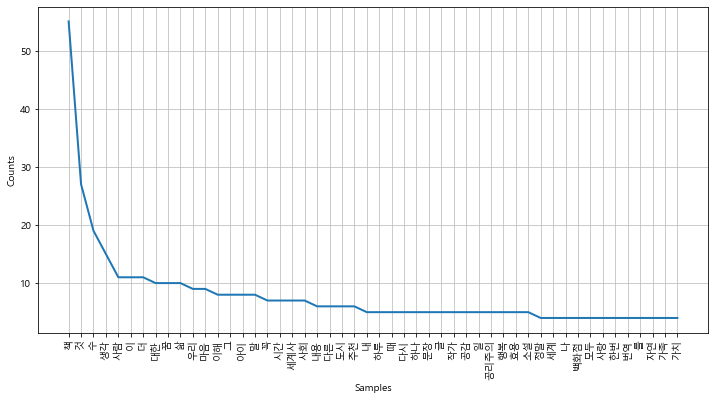

In [87]:
plt.figure(figsize=(12,6))
t_b.plot(50)
plt.show()

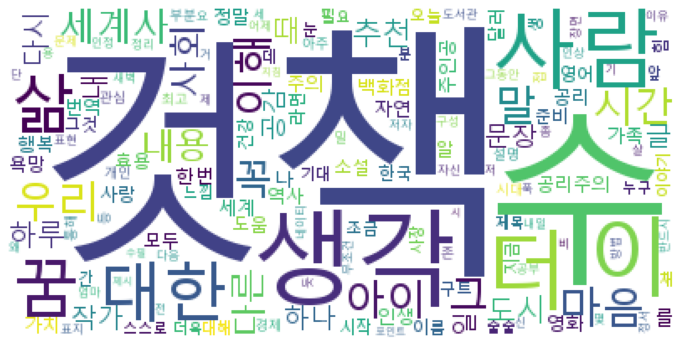

In [88]:
t_b_data = t_b.vocab().most_common(150)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(t_b_data))
plt.figure(figsize=(12,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [89]:
bookname

['건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)',
 '부의 인문학',
 '존리의 부자되기 습관(교보 단독 리커버)',
 '방구석 미술관. 2: 한국',
 '울지 않는 늑대',
 '나를 잃어가면서 지켜야 할 관계는 없다',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '실패하지 않는 웹소설 연재의 기술',
 '달러구트 꿈 백화점',
 '흔한남매. 2',
 '내 삶을 바꾸는 치유 명상 수업',
 '전투수학(2020)(유튜버 연고맨의)',
 '인간실격(새움 세계문학)',
 '진이, 지니',
 '가장 빛나는 순간은 아직 오지 않았다',
 '1cm 다이빙',
 '사는 이유가 그대라서',
 '너무 한낮의 연애',
 '굿 라이프(양장본 HardCover)',
 '루팡의 딸',
 '한국사능력검정시험 기본서: 심화 1, 2, 3급(2020)(에듀윌)',
 '애쓰지 않고 편안하게(스노우볼 에디션)',
 '내가 원하는 삶을 살았더라면',
 '지적 대화를 위한 넓고 얕은 지식: 제로 편',
 '두 마리 토끼가 넘나들다',
 '가장 빛나는 순간은 아직 오지 않았다',
 '돈을 부르는 작은 습관',
 '룬의 아이들 데모닉 세트(양장본 HardCover)(전9권)',
 '30개 도시로 읽는 세계사',
 '공기업 NCS 통합 봉투모의고사 5회(2020 하반기)(에듀윌)',
 '공리주의(현대지성 클래식 31)',
 '경제기사 궁금증 300문 300답(2020)',
 '나는 더 이상 침묵하지 않기로 했다',
 '세법강의 Summary. 1: 부가가치세, 소득세(2020)(개정판)',
 '까면서 보는 해부학 만화(한빛비즈 교양툰 8)',
 '설민석의 조선왕조실록',
 '호킹',
 '자본과 이데올로기(양장본 HardCover)',
 '서양화 자신있게 보기 1',
 '열한 계단',
 '꿈꾸는 레모네이드 클럽',
 '조용한 아내',
 '모두의 몫을 모두에게',
 '나쁜 페미니스트',
 '한낮의 우울',
 '

In [90]:

count={}
for i in bookname:
    try: count[i] += 1
    except: count[i]=1
print(count)


{'건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)': 1, '부의 인문학': 1, '존리의 부자되기 습관(교보 단독 리커버)': 1, '방구석 미술관. 2: 한국': 1, '울지 않는 늑대': 1, '나를 잃어가면서 지켜야 할 관계는 없다': 1, '우리 아이 네이티브 만들기(영어 못하는 부모의)': 2, '실패하지 않는 웹소설 연재의 기술': 1, '달러구트 꿈 백화점': 1, '흔한남매. 2': 1, '내 삶을 바꾸는 치유 명상 수업': 1, '전투수학(2020)(유튜버 연고맨의)': 1, '인간실격(새움 세계문학)': 1, '진이, 지니': 1, '가장 빛나는 순간은 아직 오지 않았다': 2, '1cm 다이빙': 1, '사는 이유가 그대라서': 1, '너무 한낮의 연애': 1, '굿 라이프(양장본 HardCover)': 1, '루팡의 딸': 1, '한국사능력검정시험 기본서: 심화 1, 2, 3급(2020)(에듀윌)': 1, '애쓰지 않고 편안하게(스노우볼 에디션)': 1, '내가 원하는 삶을 살았더라면': 1, '지적 대화를 위한 넓고 얕은 지식: 제로 편': 1, '두 마리 토끼가 넘나들다': 1, '돈을 부르는 작은 습관': 1, '룬의 아이들 데모닉 세트(양장본 HardCover)(전9권)': 1, '30개 도시로 읽는 세계사': 1, '공기업 NCS 통합 봉투모의고사 5회(2020 하반기)(에듀윌)': 1, '공리주의(현대지성 클래식 31)': 1, '경제기사 궁금증 300문 300답(2020)': 1, '나는 더 이상 침묵하지 않기로 했다': 1, '세법강의 Summary. 1: 부가가치세, 소득세(2020)(개정판)': 1, '까면서 보는 해부학 만화(한빛비즈 교양툰 8)': 1, '설민석의 조선왕조실록': 1, '호킹': 1, '자본과 이데올로기(양장본 HardCover)': 1, '서양화 자신있게 보기 1': 1, '열한 계단': 1, '꿈꾸는 레모네이드 클럽': 1, '조용한 아내': 1, '모두의 몫을 모두에게': 

In [91]:
review_df

,bookname,bookrate,ratedate,booktag,bookreview,reviewlike
0,건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover),4/4점 만점,2020.12.16,유용해요,건강에 대한 대백과사전과같은책,0
1,부의 인문학,4/4점 만점,2020.12.10,잘읽혀요,부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움,0
2,존리의 부자되기 습관(교보 단독 리커버),3/4점 만점,2020.11.29,잘읽혀요,전달하는 내용이 명확하고 꼭 필요한 내용들,0
3,방구석 미술관. 2: 한국,4/4점 만점,2020.11.27,잘읽혀요,어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제...,0
4,울지 않는 늑대,4/4점 만점,2020.11.27,잘읽혀요,도서관에서 빌려 읽었다가 하루만에 다 읽은 책.\n특히 새벽에 잘 읽혔는데 정말 재...,0
...,...,...,...,...,...,...
95,관계의 과학,4/4점 만점,2020.03.08,잘읽혀요,"ㅡ술술 읽히눈 과학책. 어려운 용어도, 고개 끄덕이며 읽을수 있게 해준다는.~",1
96,백년을 살아보니,4/4점 만점,2020.03.04,잘읽혀요,이책을 읽으면 마음이 편해지면서 따뜻해집니다~읽어보세요~,0
97,영화를 찍으며 생각한 것(양장본 HardCover),4/4점 만점,2020.03.03,좋아요,영화는 감독의 예술이라는 것을 이해한다면 필수로 읽으면 좋을 작품입니다.,0
98,시작의 기술(양장본 HardCover),4/4점 만점,2020.02.28,잘읽혀요,스스로 변화하는 데 큰 도움을 주는 책입니다,0


In [95]:
bookname

['건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover)',
 '부의 인문학',
 '존리의 부자되기 습관(교보 단독 리커버)',
 '방구석 미술관. 2: 한국',
 '울지 않는 늑대',
 '나를 잃어가면서 지켜야 할 관계는 없다',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '우리 아이 네이티브 만들기(영어 못하는 부모의)',
 '실패하지 않는 웹소설 연재의 기술',
 '달러구트 꿈 백화점',
 '흔한남매. 2',
 '내 삶을 바꾸는 치유 명상 수업',
 '전투수학(2020)(유튜버 연고맨의)',
 '인간실격(새움 세계문학)',
 '진이, 지니',
 '가장 빛나는 순간은 아직 오지 않았다',
 '1cm 다이빙',
 '사는 이유가 그대라서',
 '너무 한낮의 연애',
 '굿 라이프(양장본 HardCover)',
 '루팡의 딸',
 '한국사능력검정시험 기본서: 심화 1, 2, 3급(2020)(에듀윌)',
 '애쓰지 않고 편안하게(스노우볼 에디션)',
 '내가 원하는 삶을 살았더라면',
 '지적 대화를 위한 넓고 얕은 지식: 제로 편',
 '두 마리 토끼가 넘나들다',
 '가장 빛나는 순간은 아직 오지 않았다',
 '돈을 부르는 작은 습관',
 '룬의 아이들 데모닉 세트(양장본 HardCover)(전9권)',
 '30개 도시로 읽는 세계사',
 '공기업 NCS 통합 봉투모의고사 5회(2020 하반기)(에듀윌)',
 '공리주의(현대지성 클래식 31)',
 '경제기사 궁금증 300문 300답(2020)',
 '나는 더 이상 침묵하지 않기로 했다',
 '세법강의 Summary. 1: 부가가치세, 소득세(2020)(개정판)',
 '까면서 보는 해부학 만화(한빛비즈 교양툰 8)',
 '설민석의 조선왕조실록',
 '호킹',
 '자본과 이데올로기(양장본 HardCover)',
 '서양화 자신있게 보기 1',
 '열한 계단',
 '꿈꾸는 레모네이드 클럽',
 '조용한 아내',
 '모두의 몫을 모두에게',
 '나쁜 페미니스트',
 '한낮의 우울',
 '

import collections
a = [1,1,1,1,2,2,2,2,2,3,3,4,5,5]
counter=collections.Counter(a)
print(counter)
print(counter.values())
print(counter.keys())
print(counter.most_common(3))

In [102]:
import collections

counter=collections.Counter(bookname)
print(counter)
print()
print(counter.values())
print()
print(counter.keys())
print()
print(counter.most_common(3))

Counter({'나미야 잡화점의 기적(땡큐 에디션)(양장본 HardCover)': 82, '곰돌이 푸, 행복한 일은 매일 있어': 54, '언어의 온도(170만부 기념 에디션)': 49, '어린 왕자(양장본 HardCover)': 8, '나의 문화유산답사기: 산사 순례(반양장)': 7, '나는 나로 살기로 했다': 6, '열두 발자국': 6, '착하게, 그러나 단호하게(30쇄 돌파 한정판 블루 에디션)': 6, '여행의 이유': 5, '라틴어 수업(서울국제도서전 다시, 이책 리커버판)(지적이고 아름다운 삶을 위한)': 5, '곰돌이 푸, 서두르지 않아도 괜찮아': 5, '죽고 싶지만 떡볶이는 먹고 싶어': 5, '역사의 역사': 5, '자존감 수업': 4, '미움받을 용기': 4, '오만과 편견(세계문학전집 88)': 4, '어떻게 살 것인가': 4, '돌이킬 수 없는 약속': 4, '이방인(세계문학전집 266)': 3, '아몬드(양장본 HardCover)': 3, '내게 무해한 사람': 3, '콘텐츠, 플랫폼을 만나다': 3, '알사탕(그림책이 참 좋아 39)(양장본 HardCover)': 3, '해리포터: 마법사의 돌. 1': 3, '왜 나는 너를 사랑하는가(개정판)(양장본 HardCover)': 3, '설민석의 조선왕조실록': 3, '모든 순간이 너였다': 3, '하늘 호수로 떠난 여행': 3, '시 읽는 엄마': 3, '수리부엉이는 황혼에 날아오른다': 3, '골든아워. 1': 3, '말의 품격': 3, '곰돌이 푸우 이야기(동화 보물창고 51)': 3, '빨강머리 앤이 하는 말': 3, '플랫폼 제국의 미래': 3, '만화 9급 공무원': 3, '자기 앞의 생(문학동네 세계문학)(양장본 HardCover)': 3, '퇴근길 인문학 수업: 멈춤': 3, '추리 천재 엉덩이 탐정. 6: 수상한 탐정 사무소 사건(양장본 HardCover)': 3, '완벽한 공부법': 3, '혼자 잘해주고 상처받지 마라': 2, '폴라리스 랩소디 세트(양장본 HardCov

In [103]:
print(counter.most_common(5))

[('나미야 잡화점의 기적(땡큐 에디션)(양장본 HardCover)', 82), ('곰돌이 푸, 행복한 일은 매일 있어', 54), ('언어의 온도(170만부 기념 에디션)', 49), ('어린 왕자(양장본 HardCover)', 8), ('나의 문화유산답사기: 산사 순례(반양장)', 7)]


In [128]:
review_df['bookrate'].unique()

array(['4/4점 만점', '3/4점 만점', '2/4점 만점', '1/4점 만점'], dtype=object)

In [129]:
review_df[review_df['bookrate']]='1/4점 만점'

In [130]:
review_df

,bookname,bookrate,ratedate,booktag,bookreview,reviewlike,4/4점 만점,3/4점 만점,2/4점 만점,1/4점 만점
0,건강과 치유의 비밀(안드레아스 모리츠의)(양장본 HardCover),4/4점 만점,2020.12.16,유용해요,건강에 대한 대백과사전과같은책,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
1,부의 인문학,4/4점 만점,2020.12.10,잘읽혀요,부동산에 대한 자신의 시각을 직관적이고 직설적으로 표현한 책 쉽게 읽히고 이해하고 쉬움,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
2,존리의 부자되기 습관(교보 단독 리커버),3/4점 만점,2020.11.29,잘읽혀요,전달하는 내용이 명확하고 꼭 필요한 내용들,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
3,방구석 미술관. 2: 한국,4/4점 만점,2020.11.27,잘읽혀요,어렵게만 느껴졌던 미술이 가깝게 느껴진다 그동안 내가 겁먹은게 조금 부끄럽지만 이제...,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
4,울지 않는 늑대,4/4점 만점,2020.11.27,잘읽혀요,도서관에서 빌려 읽었다가 하루만에 다 읽은 책.\n특히 새벽에 잘 읽혔는데 정말 재...,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
...,...,...,...,...,...,...,...,...,...,...
995,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,힐링 도서,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
996,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,감동적이예요,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
997,"곰돌이 푸, 행복한 일은 매일 있어",4/4점 만점,2018.10.29,좋아요,보는것만으로도 만족,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점
998,넬리 블라이의 세상을 바꾼 10일,4/4점 만점,2018.10.29,잘읽혀요,여성을 억압하고 학대하는 현장을 고발하는 여성 기자의 잠입 취재기,0,1/4점 만점,1/4점 만점,1/4점 만점,1/4점 만점


In [112]:
review_df['bookrate']='2/4점 만점'

In [105]:
bookreview

['다시읽고또읽어도 여운이 남는책!',
 '아이가 좋아합니다',
 '곰곰히 생각하게 되네요',
 '읽으면 편해지는 시집',
 '관계에 대해 다시 생각해보고 인문학접근에 좋은 책이예요',
 '리스본이라는 도시에 대한 작가의 과거의 기억 그리고 현재의 상념을 담고 있어요.',
 "늘 화를 쉽게 내어서 아이에게 미안한 엄마가 '미안해'라는 마음을 대신 전해줄수 있는 어린이 동화책",
 '일본인친구가 소개해줬습니다. 뜻 깊은 책입니다',
 '삶과 죽음이 담담하게 표현되어 있습니다. 다소 무겁게 느껴지지만 문장의 표현이 섬세해서 좋았습니다',
 '드라마 먼저 보고 책 봤는데 재밌어요.',
 '재밌어요.',
 '따뜻한 이야기.',
 '하나님의 마음을 이해할 수있는 책 너무좋아요',
 '좋아요 강추',
 '꼭읽어보세요',
 '나를 사랑하는 것이 얼마나 귀중한지 알게되는 책입니다.',
 '여행을 많이 하시는 분들이 읽으면 참 공감이됩니다.',
 '좋아요 정말',
 'teacher, l love you!',
 '명불허전 김화영 교수님의 번역. 이방인은 읽을 때 마다 새롭게 다가오지만 이 번역판이 가장 카뮈의 뜻을 잘 전달하는듯하다.',
 '미쓰다월드에 입문하게 된 계기된 책입니다 미쓰테리를 좋아하시는 분께 강추합니다',
 '통증- 근섬유가 스트레스 받아 근섬유 길이가 짧고 딱딱해져서 신경을 압박해 생긴 것. 딱딱해져서 혈류가 나빠지기때문에 다시 통증을 발생시키는 악순환.  또는 탄성을 잃고 길게 늘어져서 통증이 생기기도 한다.',
 '유용합니당',
 '나의 마음에 꽃을 피운 책',
 '인간관계에 회의감이 들 때 읽었는데 너무 많은 도움이 됐어요. 사람마다 다르다는 점, 좀 더 쿨해질 필요가 있다는 걸 느꼈습니다.',
 '정말좋은책이예요',
 '좋은책입니다',
 '내용을 파악하기 쉬우며 각 내용에 대한 근거가 뚜렷함. 현대 사회에서 느끼는 것들이 논리적으로 담겨있다.',
 '아들러 심리학을 쉽게 이해할 수 있는 책',
 '정말 재미있고 빠져들어서 읽게 된다. 풍경묘사가 섬세하고

In [ ]:
목표

1. top10 리스트 도출
2. 시계열 평점 변화
3. top10 booktag 그래프
4. top4 wordcloud,  이미지 도서
5. pos,neg


